# PURPOSE OF THIS NOTEBOOK:
Analyze and determine how much of a gap there is between Max and his second teammate since 2022. This will test my hypothesis that the issues that Checo were facing were a car issue and not an issue of his skill. 

In [1]:
import pandas as pd
import numpy as np
import fastf1
import fastf1.plotting
import matplotlib as mpl
import datetime
import timedelta

from scipy import stats
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

In [23]:
# Setting consistant variables
year = 2025
wknd = 3
ses = 'Q'
VER = 'VER'
LAW = 'TSU'
HAD = 'HAD'
colormap = mpl.cm.turbo

In [24]:
# Doing a test run to plot 
session = fastf1.get_session(year, wknd, ses)
session.load()
weekend = session.event

MaxLap = session.laps.pick_drivers(VER).pick_fastest()
LawLap = session.laps.pick_drivers(LAW).pick_fastest()
HadLap = session.laps.pick_drivers(HAD).pick_fastest()

# Get the telemetry for max
VER_x = MaxLap.telemetry['X']
VER_y = MaxLap.telemetry['Y']
VER_color = MaxLap.telemetry['Speed']
VER_laptime = MaxLap.telemetry[-1:]
VER_td = timedelta.Timedelta(MaxLap['LapTime'])

# Get telemetry for liam
LAW_x = LawLap.telemetry['X']
LAW_y = LawLap.telemetry['Y']
LAW_color = LawLap.telemetry['Speed']
LAW_laptime = LawLap.telemetry[-1:]
LAW_td = timedelta.Timedelta(LawLap['LapTime'])

core           INFO 	Loading data for Japanese Grand Prix - Qualifying [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO

In [25]:
VER_points = np.array([VER_x, VER_y]).T.reshape(-1, 1, 2)
VER_segments = np.concatenate([VER_points[:-1], VER_points[1:]], axis=1)

LAW_points = np.array([LAW_x, LAW_y]).T.reshape(-1, 1, 2)
LAW_segments = np.concatenate([LAW_points[:-1], LAW_points[1:]], axis=1)

In [26]:
# Turn it into a function:
def plot_fastest_lap(segments, lap, color, weekend, driver, laptime):
    fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
    plt.title(f'{driver} time: {laptime.total.minutes}:{laptime.total.seconds}',
                size=24, loc='right')
    plt.title(f'{weekend.name} {year} - {driver} - Throttle', size=24, loc='left')


    # Adjust margins and turn of axis
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
    ax.axis('off')


    # After this, we plot the data itself.
    # Create background track line
    ax.plot(lap.telemetry['X'], lap.telemetry['Y'],
            color='black', linestyle='-', linewidth=16, zorder=0)

    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(color.min(), color.max())
    lc = LineCollection(segments, cmap=colormap, norm=norm,
                        linestyle='-', linewidth=5)

    # Set the values used for colormapping
    lc.set_array(color)

    # Merge all line segments together
    line = ax.add_collection(lc)


    # Finally, we create a color bar as a legend.
    cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
    normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
    legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap,
                                    orientation="horizontal")


    # Show the plot
    plt.show()
    print(f"{driver} time: {laptime.total.minutes}:{laptime.total.seconds}")

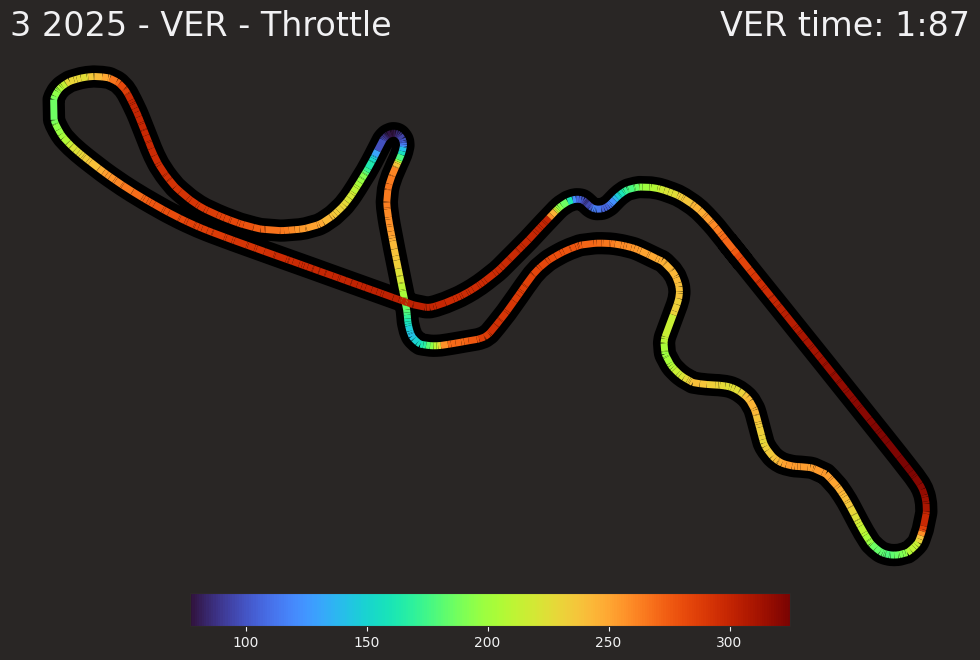

VER time: 1:87


In [27]:
# Plot Max's lap
plot_fastest_lap(VER_segments, MaxLap, VER_color, weekend, VER, VER_td)

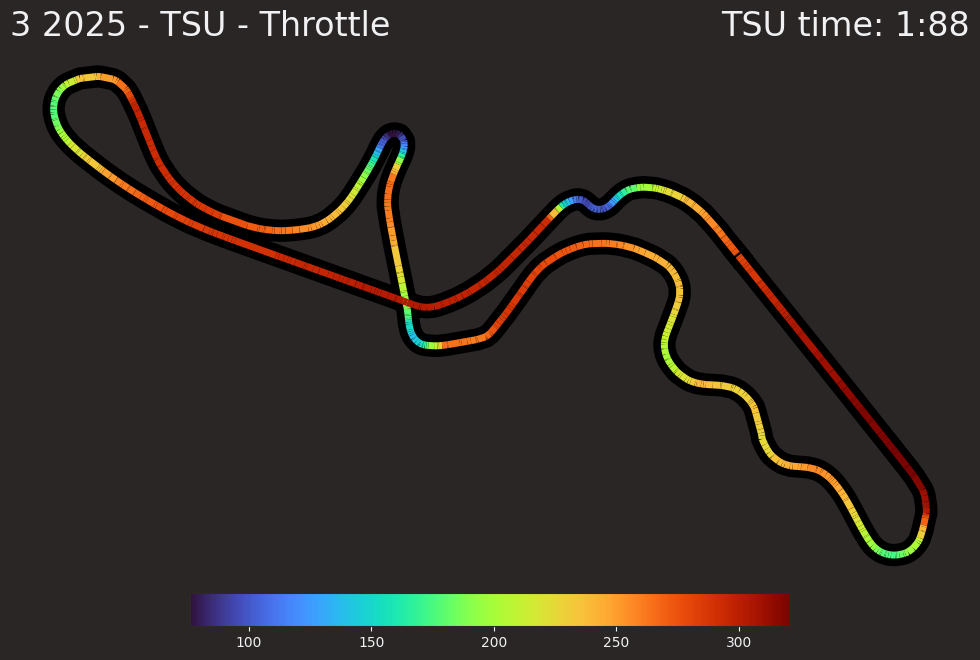

TSU time: 1:88


In [28]:
# now for lawson
plot_fastest_lap(LAW_segments, LawLap, LAW_color, weekend, LAW, LAW_td)


req            INFO 	Using cached data for driver_info


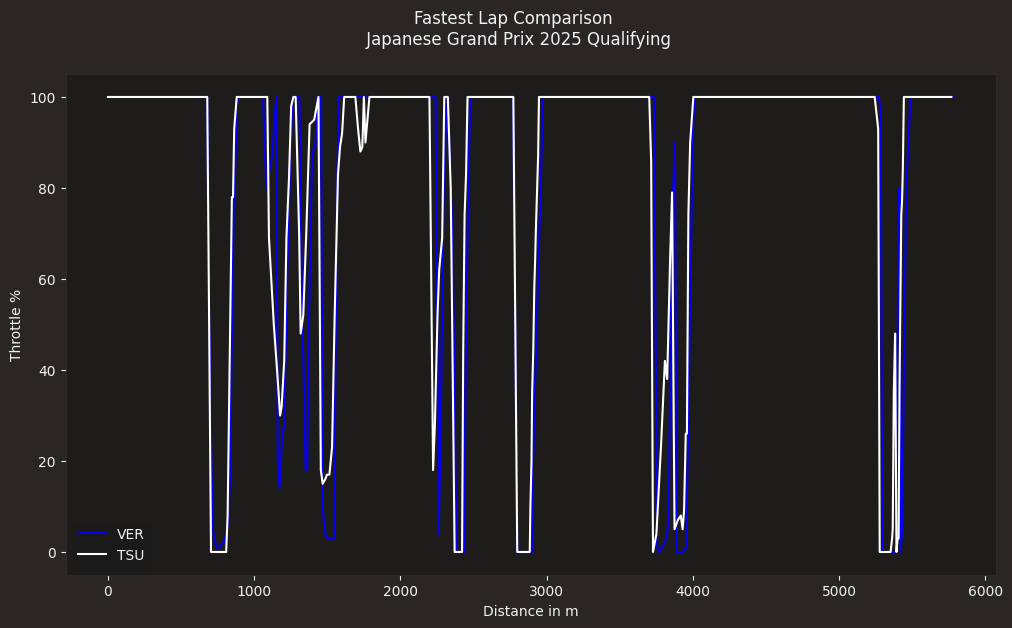

In [29]:
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')

VER_tel = MaxLap.get_car_data().add_distance()
LAW_tel = LawLap.get_car_data().add_distance()

rbr_color = fastf1.plotting.get_team_color(MaxLap['Team'], session=session)
vcarb_color = fastf1.plotting.get_team_color(HadLap['Team'], session=session)

fig, ax = plt.subplots(figsize=(12,6.5))
ax.plot(VER_tel['Distance'], VER_tel['Throttle'], color=rbr_color, label=VER)
ax.plot(LAW_tel['Distance'], LAW_tel['Throttle'], color='white', label=LAW)

ax.set_xlabel('Distance in m')
ax.set_ylabel('Throttle %')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.show()

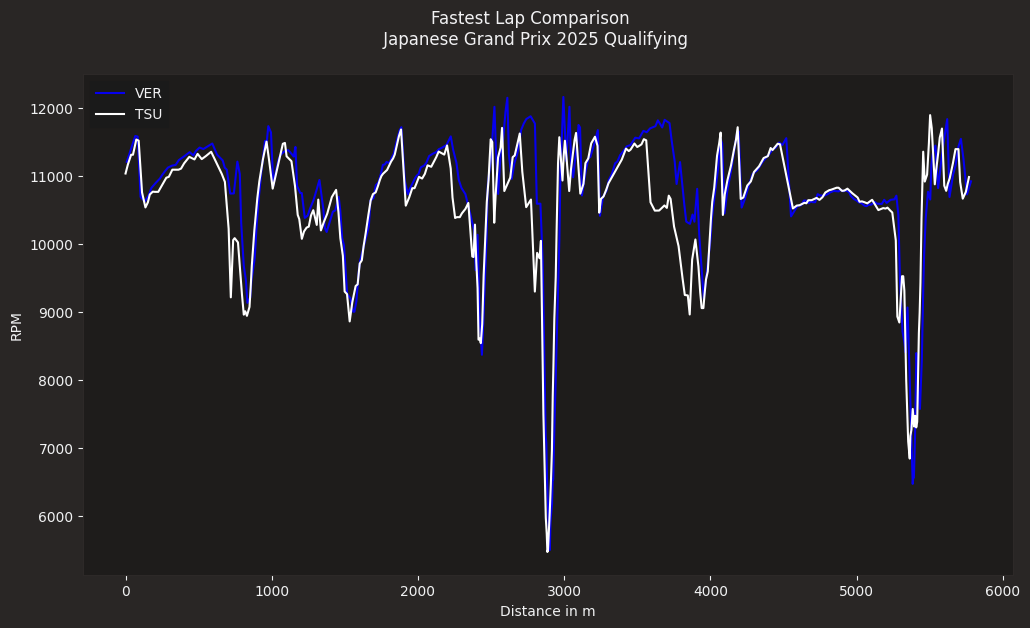

In [30]:
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')

VER_tel = MaxLap.get_car_data().add_distance()
LAW_tel = LawLap.get_car_data().add_distance()

rbr_color = fastf1.plotting.get_team_color(MaxLap['Team'], session=session)
vcarb_color = fastf1.plotting.get_team_color(HadLap['Team'], session=session)

fig, ax = plt.subplots(figsize=(12,6.5))
ax.plot(VER_tel['Distance'], VER_tel['RPM'], color=rbr_color, label=VER)
ax.plot(LAW_tel['Distance'], LAW_tel['RPM'], color='white', label=LAW)

ax.set_xlabel('Distance in m')
ax.set_ylabel('RPM')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.show()


## MY HYPOTHESIS
The issues that Checo and Liam were facing driving the redbull were a car issue and not a driver issue. 

### HOW WOULD I PROVE THAT
I would need to control for driver skill as much as possible. We're looking for evidence of variation between the two drivers. One way to set a baseline is to compare variations between two drivers on multiple teams to get a baseline.

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cac

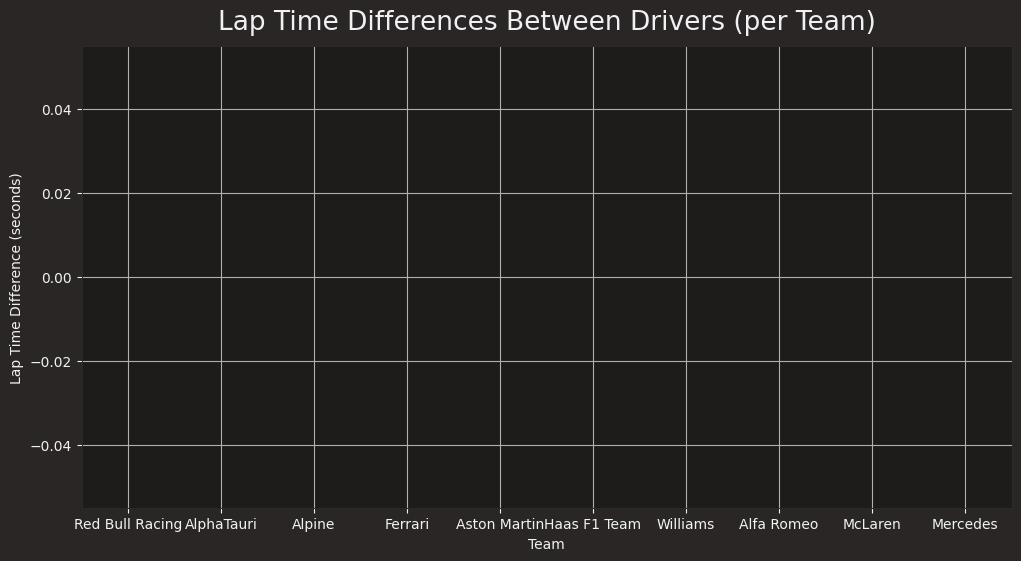

In [17]:
# TODO: loop through races to create larger datasets and more concrete plots.
# import 1 race, change to loop to compare multiple races overtime
race = fastf1.get_session(2022, 'Monaco', 'R')
race.load()

# Make a list of all the teams 
Teams = race.laps['Team'].unique().tolist()
# Box plot between two drivers in Monaco
# TODO: Change to loop to showcase all races. 
team_differences = {}

# Convert time delta to seconds 
race.laps['LapTime'] = race.laps['LapTime'].map(lambda x: datetime.timedelta.total_seconds(x) if (np.all(pd.notnull(x))) else np.nan)
for team in Teams:
    drivers = race.laps[race.laps['Team'] == team].Driver.unique()
    # Pull drivers and laps
    driver1 = drivers[0]
    driver2= drivers[1]
    driver1_laps = race.laps[race.laps['Driver'] == driver1].copy()
    driver2_laps = race.laps[race.laps['Driver'] == driver2].copy()

    # filter to only laps where both drivers completed 
    common_laps = np.intersect1d(driver1_laps['LapNumber'], driver2_laps['LapNumber'])

    driver1_common_laps = driver1_laps[driver1_laps['LapNumber'].isin(common_laps)]
    driver2_common_laps = driver2_laps[driver2_laps['LapNumber'].isin(common_laps)]

    # Calculate  the lap time differences
    lap_time_diffs = driver1_common_laps['LapTime'].values - driver2_common_laps['LapTime'].values

    team_differences[team] = lap_time_diffs

    
# Prepare data for the box plot
box_plot_data = []
team_names = []
for team, diffs in team_differences.items():
    box_plot_data.append(diffs)
    team_names.append(team)

# Create the box plot
plt.figure(figsize=(12, 6))
plt.boxplot(box_plot_data, tick_labels=team_names, showmeans=True)
plt.title("Lap Time Differences Between Drivers (per Team)")
plt.xlabel("Team")
plt.ylabel("Lap Time Difference (seconds)")
plt.grid(True)
plt.show()


## quick run down of the box plot 
Box plot maps out the differences between two drivers of each team. looking at the mean and spread, if it goes towards the negative, it would mean the second driver is slower, if it more towards positive it would imply that the first driver is much slower. for Monaco, Sergio was slower more on average than Max with a huge spread, other teams are much more close with a mean much more close than zero. 

In [11]:
# Define a list of years we want to work with 
years = [2024]

In [12]:
all_team_differences = {}
for year in years:
    print(year)
    schedule_raw = fastf1.get_event_schedule(year).copy()
    # remove testing events
    schedule_filtered = schedule_raw[schedule_raw['EventFormat'] != 'testing']
    # Save as a list
    schedule_list = schedule_filtered['RoundNumber'].tolist()
    team_differences = {}
    for races in schedule_list:
        print(races)
        try:
            # Get the session information
            race = fastf1.get_session(year, races, 'R')
            race.load()
            # Define the teams that particapate in a race 
            Teams = race.laps['Team'].unique().tolist()
            # Copy to not modify the original
            race_laps = race.laps.copy()

            # convert time delta to seconds 
            race_laps['LapTime'] = race_laps['LapTime'].map(lambda x: datetime.timedelta.total_seconds(x) if (np.all(pd.notnull(x))) else np.nan)

            # loop through the teams
            for team in Teams:
                # get the drivers
                drivers = race_laps[race_laps['Team'] == team].Driver.unique()
                if len(drivers) < 2:
                    print(f"Team {team} in {race}, {year} has fewer than two drivers, Skipping.")
                driver1 = drivers[0]
                driver2 = drivers[1]
                # Get their laps
                driver1_laps = race_laps[race_laps['Driver'] == driver1].copy()
                driver2_laps = race_laps[race_laps['Driver'] == driver2].copy()
                
                # filter to only laps where both drivers completed 
                common_laps = np.intersect1d(driver1_laps['LapNumber'], driver2_laps['LapNumber'])

                driver1_common_laps = driver1_laps[driver1_laps['LapNumber'].isin(common_laps)]
                driver2_common_laps = driver2_laps[driver2_laps['LapNumber'].isin(common_laps)]
                
                # Calculate  the lap time differences
                lap_time_diffs = driver1_common_laps['LapTime'].values - driver2_common_laps['LapTime'].values

                if team not in all_team_differences:
                    all_team_differences[team] = []
                all_team_differences[team].extend(lap_time_diffs)
            
            # Clear cache after
            fastf1.Cache.clear_cache()

        except Exception as e:
            print(f"Error processing {year}, {session}: {e}")




core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No ca

2024
1


_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
req            INFO 	No cached data found for car_data. Loading data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
_api           INFO 	Parsing position data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for weather_data. Loading data...
_api           INFO 	Fetching weather data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for race_control_messages. 

2


_api           INFO 	Parsing timing data...
_api        WARNING 	Failed to align laps for drivers: ['10']
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
req            INFO 	No cached data found for car_data. Loading data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
_api        WARNING 	Driver 55: Car data is incomplete!
_api        WARNING 	Driver 38: Car data is incomplete!
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
_api           INFO 	Parsing position data...
_api        WARNING 	Driver 55: Position data is incomplete!
_api        WARNING 	Driver 38: Position data is incomplete!
_

3


_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
req            INFO 	No cached data found for car_data. Loading data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
_api           INFO 	Parsing position data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for weather_data. Loading data...
_api           INFO 	Fetching weather data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for race_control_messages. 

Team Williams in 2024 Season Round 3: Australian Grand Prix - Race, 2024 has fewer than two drivers, Skipping.
Error processing 2024, 2025 Season Round 1: Australian Grand Prix - Qualifying: index 1 is out of bounds for axis 0 with size 1
4


_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
req            INFO 	No cached data found for car_data. Loading data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
_api           INFO 	Parsing position data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for weather_data. Loading data...
_api           INFO 	Fetching weather data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for race_control_messages. 

5


_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
req            INFO 	No cached data found for car_data. Loading data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
_api           INFO 	Parsing position data...
_api        WARNING 	Driver 241: Position data is incomplete!
_api        WARNING 	Driver 242: Position data is incomplete!
_api        WARNING 	Driver 243: Position data is incomplete!
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for weather_data

6


_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
req            INFO 	No cached data found for car_data. Loading data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
_api           INFO 	Parsing position data...
_api        WARNING 	Driver 241: Position data is incomplete!
_api        WARNING 	Driver 242: Position data is incomplete!
_api        WARNING 	Driver 243: Position data is incomplete!
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for weather_data

7


_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
req            INFO 	No cached data found for car_data. Loading data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
_api           INFO 	Parsing position data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for weather_data. Loading data...
_api           INFO 	Fetching weather data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for race_control_messages. 

8


_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
req            INFO 	No cached data found for car_data. Loading data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
_api           INFO 	Parsing position data...
_api        WARNING 	Driver 241: Position data is incomplete!
_api        WARNING 	Driver 242: Position data is incomplete!
_api        WARNING 	Driver 243: Position data is incomplete!
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for weather_data

9


_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
req            INFO 	No cached data found for car_data. Loading data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
_api           INFO 	Parsing position data...
_api        WARNING 	Driver 241: Position data is incomplete!
_api        WARNING 	Driver 242: Position data is incomplete!
_api        WARNING 	Driver 243: Position data is incomplete!
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for weather_data

10


_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
req            INFO 	No cached data found for car_data. Loading data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
_api           INFO 	Parsing position data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for weather_data. Loading data...
_api           INFO 	Fetching weather data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for race_control_messages. 

11


_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
req            INFO 	No cached data found for car_data. Loading data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
_api        WARNING 	Driver 12: Car data is incomplete!
_api        WARNING 	Driver  2: Car data is incomplete!
_api        WARNING 	Driver  3: Car data is incomplete!
_api        WARNING 	Driver  4: Car data is incomplete!
_api        WARNING 	Driver 10: Car data is incomplete!
_api        WARNING 	Driver 11: Car data is incomplete!
_api        WARNING 	Driver 14: Car data is incomplete!
_api        WARNING 	Driver 16: Car data is incomplete!
_api        WARNING 	Driver 18: Car data is incomplete!
_api        WARN

12


_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
req            INFO 	No cached data found for car_data. Loading data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
_api        WARNING 	Driver 21: Car data is incomplete!
_api        WARNING 	Driver  3: Car data is incomplete!
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
_api           INFO 	Parsing position data...
_api        WARNING 	Driver 21: Position data is incomplete!
_api        WARNING 	Driver  3: Position data is incomplete!
req            INFO 	Data has been written to cache!
req       

13


_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
req            INFO 	No cached data found for car_data. Loading data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
_api           INFO 	Parsing position data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for weather_data. Loading data...
_api           INFO 	Fetching weather data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for race_control_messages. 

14


_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
req            INFO 	No cached data found for car_data. Loading data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
_api           INFO 	Parsing position data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for weather_data. Loading data...
_api           INFO 	Fetching weather data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for race_control_messages. 

15


_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
req            INFO 	No cached data found for car_data. Loading data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
_api           INFO 	Parsing position data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for weather_data. Loading data...
_api           INFO 	Fetching weather data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for race_control_messages. 

16


_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
req            INFO 	No cached data found for car_data. Loading data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
_api           INFO 	Parsing position data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for weather_data. Loading data...
_api           INFO 	Fetching weather data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for race_control_messages. 

17


_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
req            INFO 	No cached data found for car_data. Loading data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
_api           INFO 	Parsing position data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for weather_data. Loading data...
_api           INFO 	Fetching weather data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for race_control_messages. 

18


_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
req            INFO 	No cached data found for car_data. Loading data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
_api        WARNING 	Driver  2: Car data is incomplete!
_api        WARNING 	Driver 40: Car data is incomplete!
_api        WARNING 	Driver  3: Car data is incomplete!
_api        WARNING 	Driver 18: Car data is incomplete!
_api        WARNING 	Driver 43: Car data is incomplete!
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
_api           INFO 	Parsing position data...
_api        WARNI

19


_api           INFO 	Parsing timing data...
_api        WARNING 	Failed to align laps for drivers: ['44']
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
req            INFO 	No cached data found for car_data. Loading data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
_api        WARNING 	Driver  2: Car data is incomplete!
_api        WARNING 	Driver  3: Car data is incomplete!
_api        WARNING 	Driver 30: Car data is incomplete!
_api        WARNING 	Driver 43: Car data is incomplete!
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
_api           INFO 	Parsing position data...
_api       

20


_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
req            INFO 	No cached data found for car_data. Loading data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
_api        WARNING 	Driver  2: Car data is incomplete!
_api        WARNING 	Driver  3: Car data is incomplete!
_api        WARNING 	Driver 30: Car data is incomplete!
_api        WARNING 	Driver 43: Car data is incomplete!
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
_api           INFO 	Parsing position data...
_api        WARNING 	Driver  2: Position data is incomplete!
_api        

21


_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 23
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	No cached data found for car_data. Loading data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
_api           INFO 	Parsing position data...
_api        WARNING 	Driver 241: Position data is incomplete!
_api        WARNING 	Driver 242: Position data is incomplete!
_api        WARNING 	Dri

Team Williams in 2024 Season Round 21: São Paulo Grand Prix - Race, 2024 has fewer than two drivers, Skipping.
Error processing 2024, 2025 Season Round 1: Australian Grand Prix - Qualifying: index 1 is out of bounds for axis 0 with size 1
22


_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
core        WARNING 	Driver 63: Lap timing integrity check failed for 2 lap(s)
core        WARNING 	Driver 44: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 55: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 16: Lap timing integrity check failed for 2 lap(s)
core        WARNING 	Driver  1: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver  4: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 81: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 30: Lap timing integrity check failed for 2 lap(s)
core        WARNING 	Driver 77: Lap timing 

23


_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
req            INFO 	No cached data found for car_data. Loading data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
_api           INFO 	Parsing position data...
_api        WARNING 	Driver  2: Position data is incomplete!
_api        WARNING 	Driver  3: Position data is incomplete!
_api        WARNING 	Driver  5: Position data is incomplete!
_api        WARNING 	Driver  6: Position data is incomplete!
_api        WARNING 	Driver  7: Position data is inco

24


_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
req            INFO 	No cached data found for car_data. Loading data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
_api        WARNING 	Driver  2: Car data is incomplete!
_api        WARNING 	Driver  3: Car data is incomplete!
_api        WARNING 	Driver  5: Car data is incomplete!
_api        WARNING 	Driver  6: Car data is incomplete!
_api        WARNING 	Driver  7: Car data is incomplete!
_api        WARNING 	Driver  8: Car data is incomplete!
_api        WARNING 	Driver  9: Car data is incomplete!
_api        WARNING 	Driver 12: Car data is incomplete!
_api        WARNING 	Driver 15: Car data is incomplete!
_api        WARN

<Figure size 640x480 with 0 Axes>

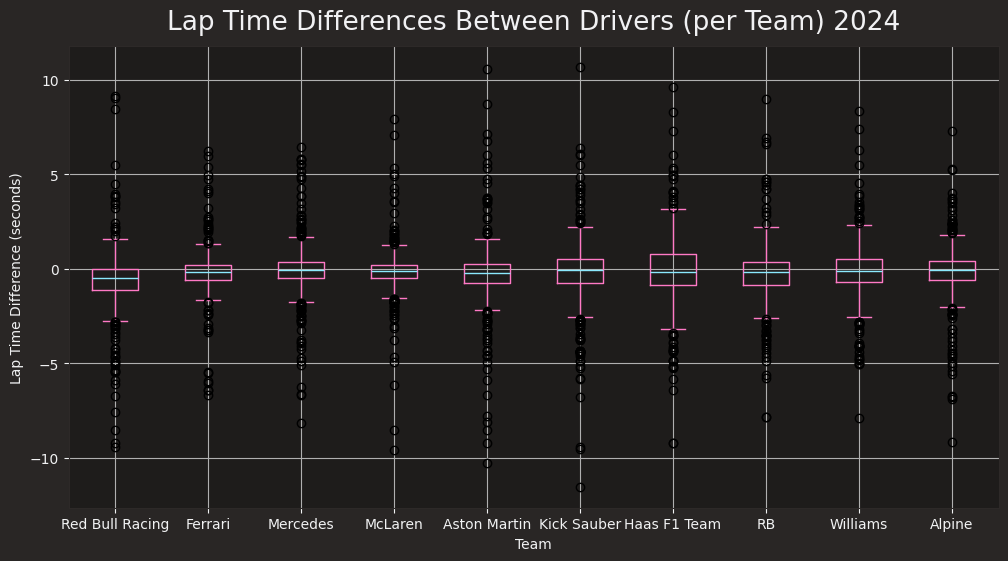

In [ ]:
# Convert to DataFrame
df = pd.DataFrame.from_dict(all_team_differences, orient='index')

# Transpose for boxplot
df_transposed = df.T

# Drop NaNs
df_transposed = df_transposed.dropna()

# Outlier Removal (using Z-score)
z = np.abs(stats.zscore(df_transposed))
# Removing Z-score over 2 
df_transposed = df_transposed[(z < 2).all(axis=1)] 

# Create Boxplot
plt.figure()
df_transposed.plot(kind='box', figsize=(12, 6))
plt.title("Lap Time Differences Between Drivers (per Team) 2024")
plt.xlabel("Team")
plt.ylabel("Lap Time Difference (seconds)")
plt.grid(True)
plt.show()


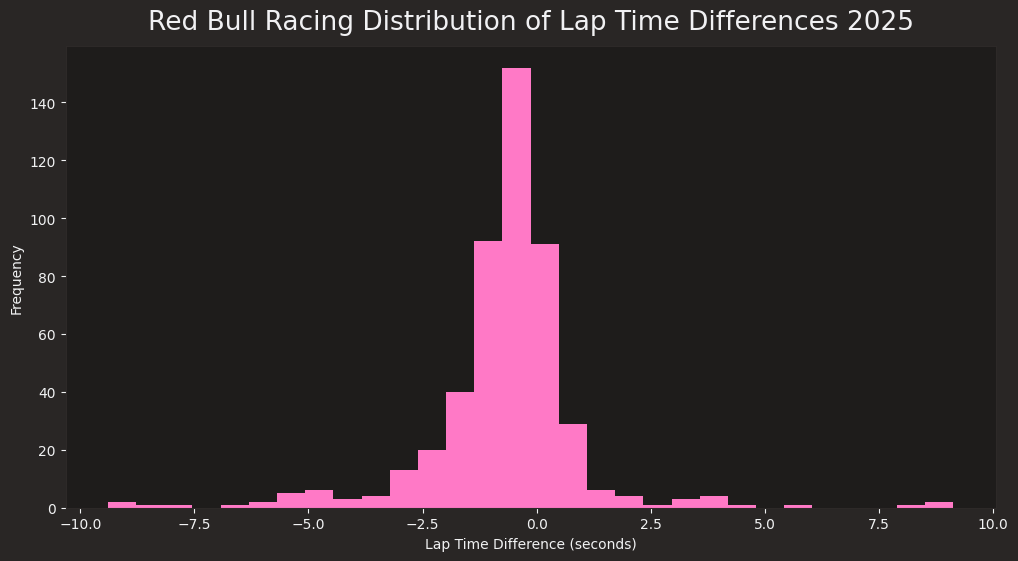

In [ ]:
# plot histogram of laptime data.
plt.figure(figsize=(12, 6))
plt.hist(df_transposed['Red Bull Racing'], bins=30)
plt.xlabel("Lap Time Difference (seconds)")
plt.ylabel("Frequency")
plt.title("Red Bull Racing Distribution of Lap Time Differences 2024") 
plt.show()

## Histogram Takeaway
**2023 season** There is a very slight skew to the left, indicating that Max does have an edge over Checo over the span of a race season. 

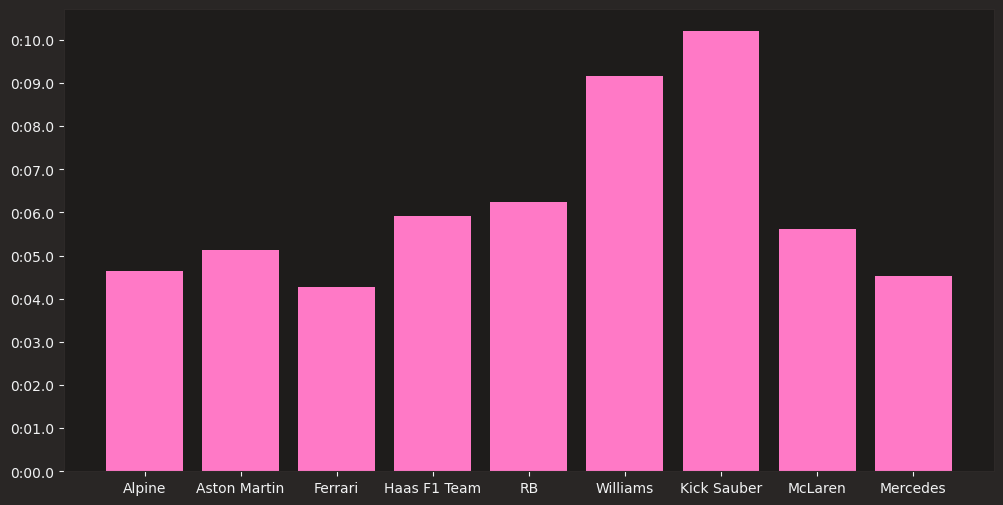

In [15]:
# Standard deviation of lap time differences 
team_std = {}
for team in Teams:
    drivers = race.laps[race.laps['Team'] == team].Driver.unique()
    # Pull drivers and laps
    driver1 = drivers[0]
    driver2= drivers[1]
    driver1_laps = race.laps[race.laps['Driver'] == driver1].copy()
    driver2_laps = race.laps[race.laps['Driver'] == driver2].copy()

    # filter to only laps where both drivers completed 
    common_laps = np.intersect1d(driver1_laps['LapNumber'], driver2_laps['LapNumber'])   
    driver1_common_laps = driver1_laps[driver1_laps['LapNumber'].isin(common_laps)]
    driver2_common_laps = driver2_laps[driver2_laps['LapNumber'].isin(common_laps)]

    # reset index
    driver1_common_laps.reset_index(inplace=True)
    driver2_common_laps.reset_index(inplace=True)

    df = pd.DataFrame(columns=['driver1_times', 'driver2_times'])
    df['driver1_times'] = driver1_common_laps['LapTime']
    df['driver2_times'] = driver2_common_laps['LapTime']

    std_series = pd.concat([df.driver1_times, df.driver2_times])
    
    team_std[team] = std_series.std()

bar_graph_data = []
team_names = []
for team, diffs in team_std.items():
    bar_graph_data.append(diffs)
    team_names.append(team)

plt.figure(figsize=(12, 6))
plt.bar(team_names, bar_graph_data)
plt.show()


# Now checking Telemetry 

In [ ]:
# Pull from one season/race to see which data is needed to plot each visualization 
# Then collect overtime 
# using 2025 Japan 
race = fastf1.get_session(2025, 3, 'R')
race.load()


core           INFO 	Loading data for Japanese Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No c

In [ ]:
race

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
